In [1]:
import numpy as np
from matplotlib import pyplot as plt
from lqfn.quantum_systems import NonRelativisticSingleParticle1D
from lqfn.plotting import plot_delta_E

Calculation of the propagator for a one dimensional anharmonic oscillator, meaning that the potential is
$$
    V(x) = \frac{x^4}{4}
$$

In [2]:
N=20
a=0.5
eps=1.4
N_cor=20
N_cf=1000
N_copies = 10

In [3]:
def S_per_timeslice_quartic(j,x): # harm. osc. S
    jp = (j+1)%N # next site
    jm = (j-1+N)%N # previous site
    return a*x[j]**4/4 + x[j]*(x[j]-x[jp]-x[jm])/a

In [16]:
def quartic_potential(x):
    return x**4/4

In [17]:
anharmonic_oscillator = NonRelativisticSingleParticle1D(T=a*N, N=N, V=quartic_potential, S_per_timeslice=S_per_timeslice_quartic)

In [18]:
eigenstates = anharmonic_oscillator.solve_schrodinger(10000,2)

Computing...
Took 0.012998104095458984


In [19]:
eigenstates.energies

array([0.42084619, 1.50799538])

In [20]:
E_exact = eigenstates.energies[1] - eigenstates.energies[0]
print(f'$\\Delta E$ of quartic oscillator: {E_exact}')

$\Delta E$ of quartic oscillator: 1.0871491896739418


Recall that the actual $\Delta E$ is defined with a factor of $a$

In [21]:
E_exact *= a

Calculation of the correlation function 
$$
    G(t) = \frac{1}{N} \sum_j \langle x(t_j+t)x(t_j) \rangle
$$ 
using bootstrap procedure.

In [22]:
def compute_G(x,n):
    g = 0
    for j in range(0,N):        
        g = g + x[j]*x[(j+n)%N]
    return g/N

In [30]:
average_delta_E, std_delta_E = anharmonic_oscillator.compute_delta_E(compute_G, N_cf, N_cor=50, eps=eps, N_copies=N_copies)

C:\Users\damia\AppData\Local\Temp\ipykernel_20840\3557305629.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


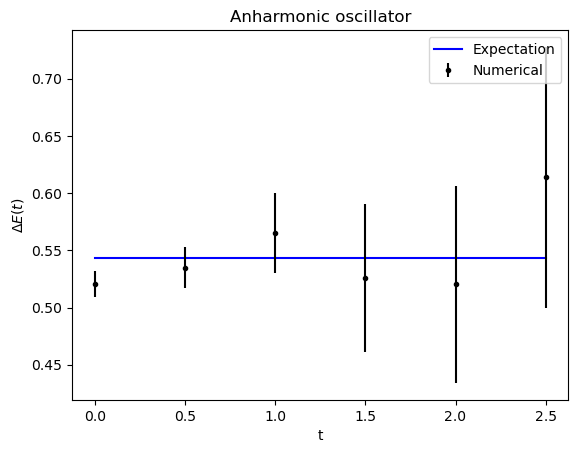

In [32]:
fig = plot_delta_E(E_exact, average_delta_E, std_delta_E, a, "Anharmonic oscillator", n=6)
fig.show()